In [1]:
from scipy.io import arff
import pandas as pd

data = arff.loadarff('ALOI/ALOI.arff')
df = pd.DataFrame(data[0])

df.head()

outlier      att1      att2  att3      att4  att5  att6  att7  att8  att9  \
0  b'yes'  0.872812  0.000005   0.0  0.000036   0.0   0.0   0.0   0.0   0.0   
1  b'yes'  0.975206  0.000000   0.0  0.000651   0.0   0.0   0.0   0.0   0.0   
2  b'yes'  0.963777  0.000000   0.0  0.002005   0.0   0.0   0.0   0.0   0.0   
3  b'yes'  0.973246  0.000000   0.0  0.000556   0.0   0.0   0.0   0.0   0.0   
4  b'yes'  0.960720  0.000000   0.0  0.000656   0.0   0.0   0.0   0.0   0.0   

   ...     att19     att20  att21     att22     att23     att24     att25  \
0  ...  0.014212  0.000104    0.0  0.025490  0.004937  0.000011  0.000054   
1  ...  0.000000  0.000000    0.0  0.004853  0.001582  0.000000  0.000000   
2  ...  0.000000  0.000000    0.0  0.007828  0.002523  0.000000  0.000393   
3  ...  0.000000  0.000000    0.0  0.004392  0.000170  0.000000  0.000000   
4  ...  0.000000  0.000000    0.0  0.010299  0.000561  0.000000  0.000084   

      att26     att27   id  
0  0.006804  0.015385  1.0  
1  0.000201  0.000000  2.0  
2  0.003800  0.000000  3.0  
3  0.000007  0.000000  4.0  
4  0.000264  0.000000  5.0  

[5 rows x 29 columns]

In [2]:
df.outlier.replace({b'no': 0, b'yes': 1}, inplace=True)
df.drop(columns='id', inplace=True)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 28 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   outlier  50000 non-null  int64  
 1   att1     50000 non-null  float64
 2   att2     50000 non-null  float64
 3   att3     50000 non-null  float64
 4   att4     50000 non-null  float64
 5   att5     50000 non-null  float64
 6   att6     50000 non-null  float64
 7   att7     50000 non-null  float64
 8   att8     50000 non-null  float64
 9   att9     50000 non-null  float64
 10  att10    50000 non-null  float64
 11  att11    50000 non-null  float64
 12  att12    50000 non-null  float64
 13  att13    50000 non-null  float64
 14  att14    50000 non-null  float64
 15  att15    50000 non-null  float64
 16  att16    50000 non-null  float64
 17  att17    50000 non-null  float64
 18  att18    50000 non-null  float64
 19  att19    50000 non-null  float64
 20  att20    50000 non-null  float64
 21  att21    500

In [4]:
(df == 0).sum(axis=0).sort_values(ascending=False)[:10]

outlier    48492
att21      46866
att7       46334
att9       45938
att12      44557
att3       44389
att8       44379
att6       39760
att20      29647
att16      29368
dtype: int64

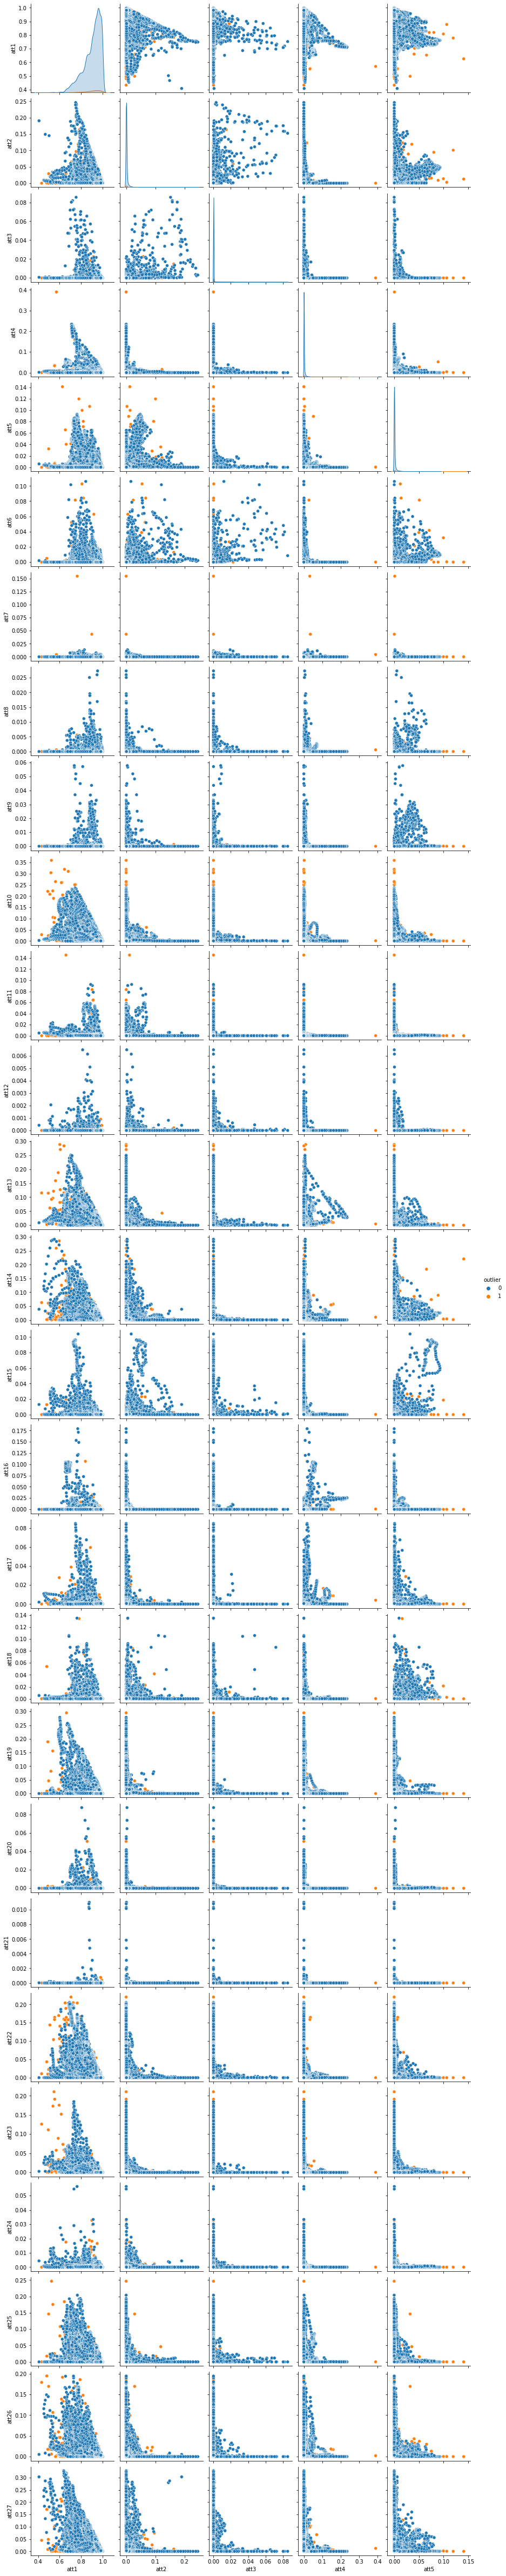

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
pp = sns.pairplot(data=df,
                  x_vars=df.drop(columns=['outlier']).columns.values,
                  y_vars=df.drop(columns=['outlier']).columns.values,
                  hue='outlier')

In [5]:
mad_df = pd.DataFrame(data = dict(df.mad()), index=['mad'], columns=df.mad().index.values)
describe_df = df.describe()
describe_df = describe_df.append(mad_df)
describe_df

outlier          att1          att2          att3          att4  \
count  50000.000000  50000.000000  50000.000000  50000.000000  50000.000000   
mean       0.030160      0.899869      0.002935      0.000162      0.002165   
std        0.171029      0.080882      0.012711      0.002093      0.010481   
min        0.000000      0.408429      0.000000      0.000000      0.000000   
25%        0.000000      0.855332      0.000000      0.000000      0.000011   
50%        0.000000      0.922028      0.000020      0.000000      0.000151   
75%        0.000000      0.961534      0.000504      0.000000      0.000816   
max        1.000000      1.000000      0.246001      0.085418      0.389667   
mad        0.058501      0.064239      0.004693      0.000310      0.003183   

               att5          att6          att7          att8          att9  \
count  50000.000000  50000.000000  50000.000000  50000.000000  50000.000000   
mean       0.001503      0.000455      0.000028      0.000044      0.000125   
std        0.006335      0.003146      0.000781      0.000521      0.001526   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000016      0.000000      0.000000      0.000000      0.000000   
75%        0.000373      0.000000      0.000000      0.000000      0.000000   
max        0.140847      0.105959      0.154695      0.027271      0.057825   
mad        0.002362      0.000832      0.000054      0.000085      0.000242   

       ...         att18         att19         att20         att21  \
count  ...  50000.000000  50000.000000  50000.000000  50000.000000   
mean   ...      0.000810      0.005664      0.000142      0.000002   
std    ...      0.004306      0.019290      0.001507      0.000104   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000002      0.000020      0.000000      0.000000   
75%    ...      0.000077      0.002215      0.000014      0.000000   
max    ...      0.134759      0.295033      0.087454      0.011022   
mad    ...      0.001369      0.008503      0.000241      0.000004   

              att22         att23         att24         att25         att26  \
count  50000.000000  50000.000000  50000.000000  50000.000000  50000.000000   
mean       0.008980      0.004107      0.000130      0.005521      0.009219   
std        0.019875      0.009557      0.000791      0.016900      0.017319   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000029      0.000136      0.000000      0.000000      0.000267   
50%        0.000884      0.000990      0.000011      0.000025      0.002317   
75%        0.007908      0.003954      0.000075      0.001307      0.010222   
max        0.220258      0.210542      0.056392      0.246541      0.194675   
mad        0.011653      0.004832      0.000181      0.008540      0.010474   

              att27  
count  50000.000000  
mean       0.015468  
std        0.031761  
min        0.000000  
25%        0.000170  
50%        0.001901  
75%        0.015320  
max        0.327949  
mad        0.019518  

[9 rows x 28 columns]

- отстувуют Nan значения 
- возможно стоит убрать att21, att7, att9 так они принимают 0 значение >80% случаях


<AxesSubplot:>

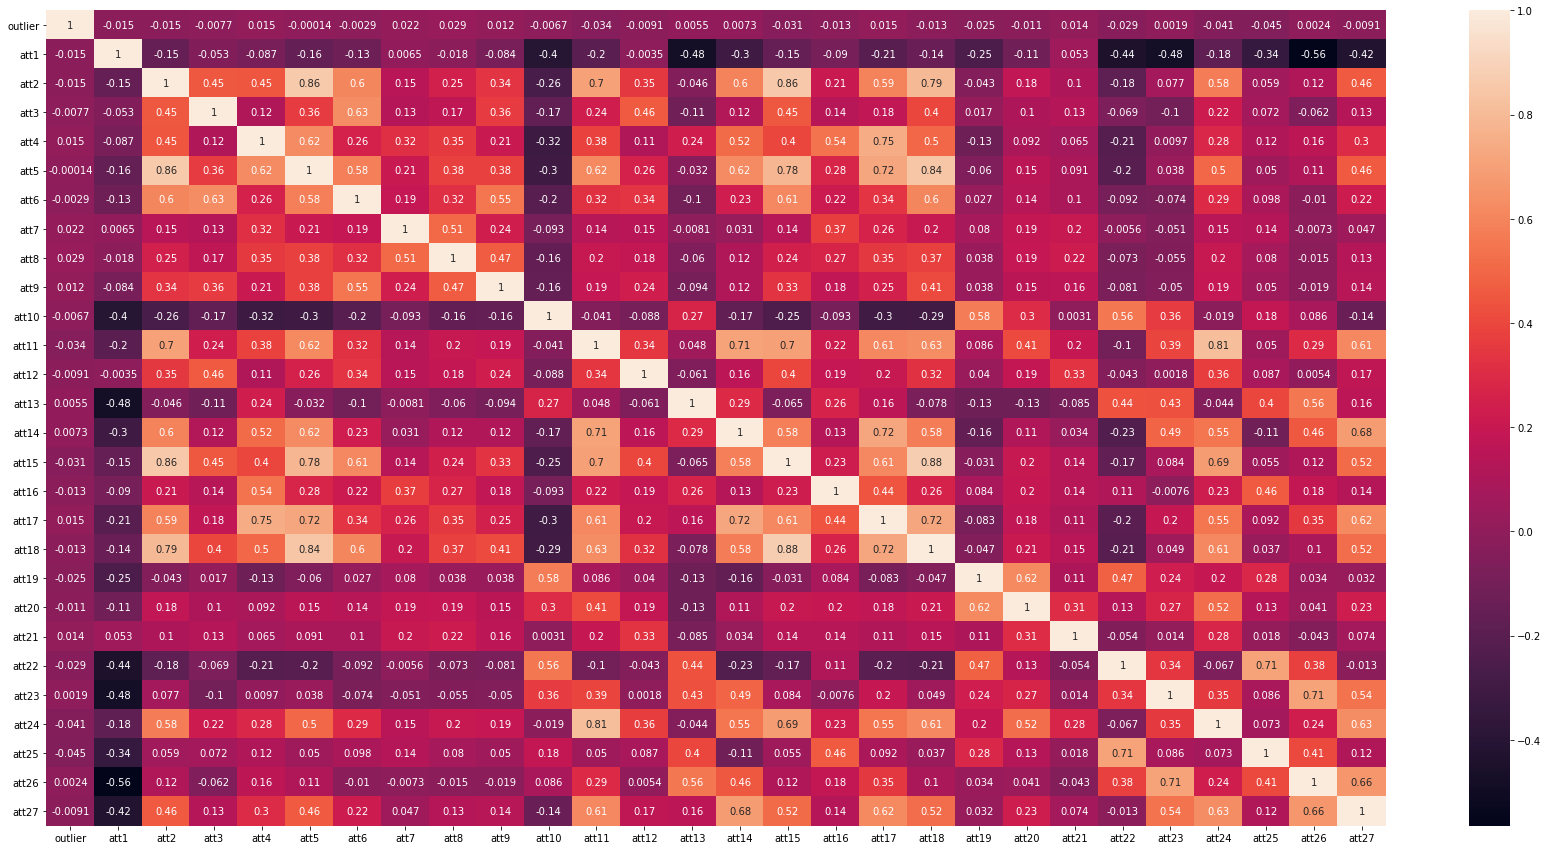

In [64]:
fig, ax = plt.subplots(figsize=(30,15))     
sns.heatmap(df.corr(method='spearman'), annot=True, ax = ax, )


<AxesSubplot:>

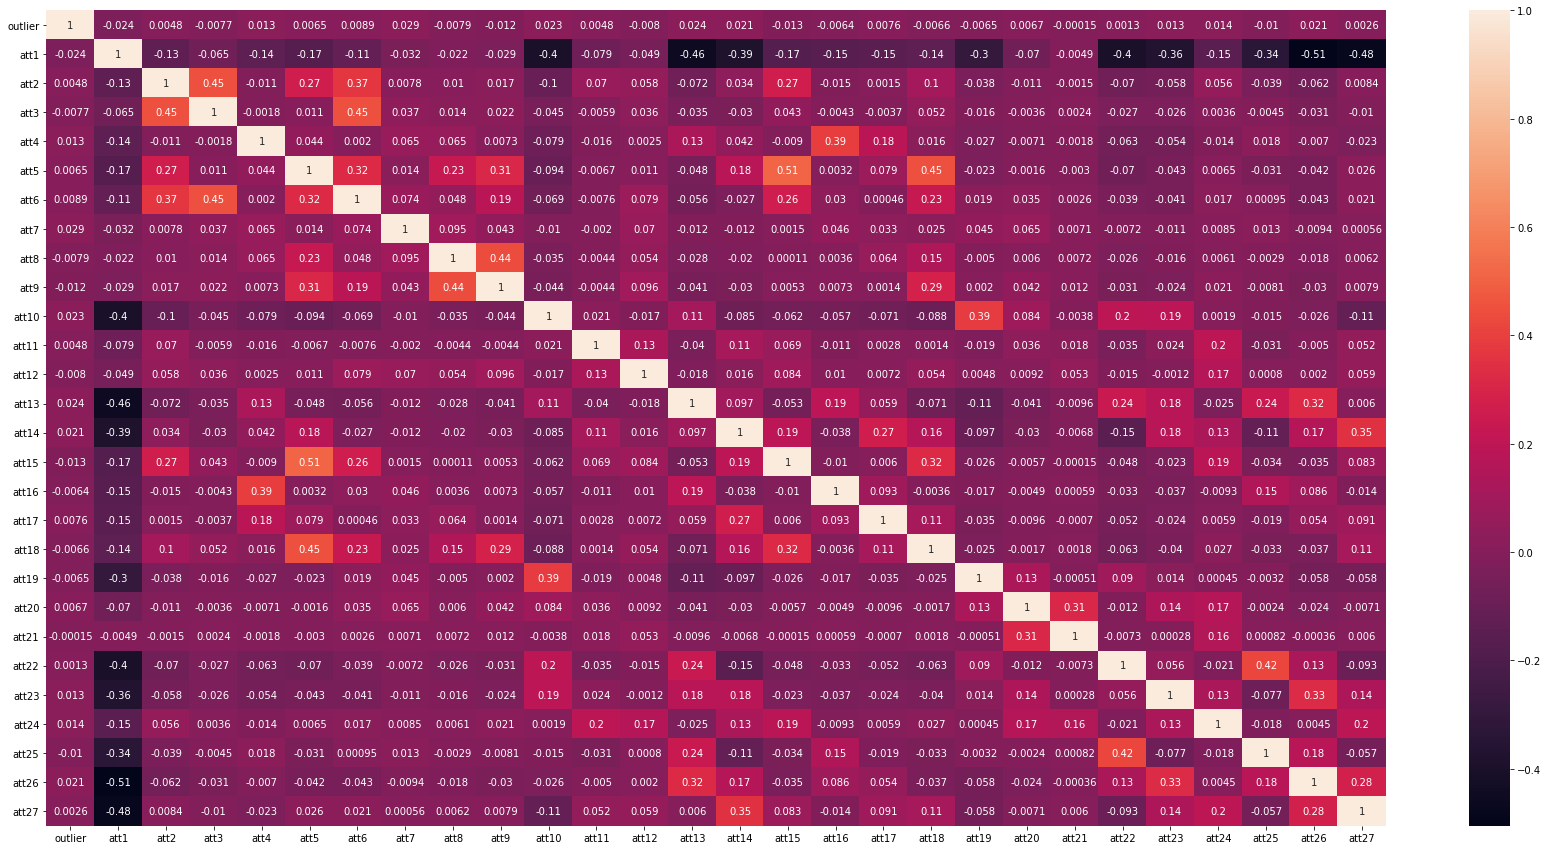

In [65]:
fig, ax = plt.subplots(figsize=(30,15))     
sns.heatmap(df.corr(method='pearson'), annot=True, ax = ax)

<AxesSubplot:xlabel='Component1', ylabel='Component2'>

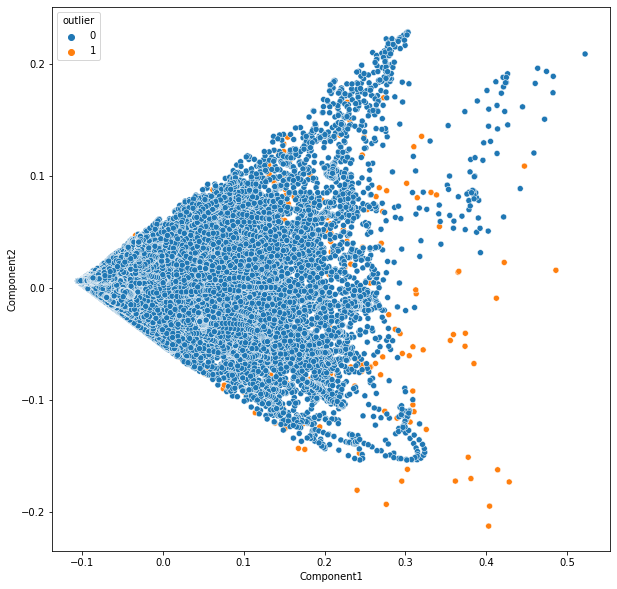

In [70]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

data_pca = pca.fit_transform(df.drop(columns=['outlier']))
df_pca = pd.DataFrame(data_pca, columns =["Component1","Component2", "Component3"])

finalDf = pd.concat([df_pca, df["outlier"]], axis = 1)

plt.figure(figsize=(10,10))
sns.scatterplot(data=finalDf,x="Component1", y = "Component2",hue="outlier",)

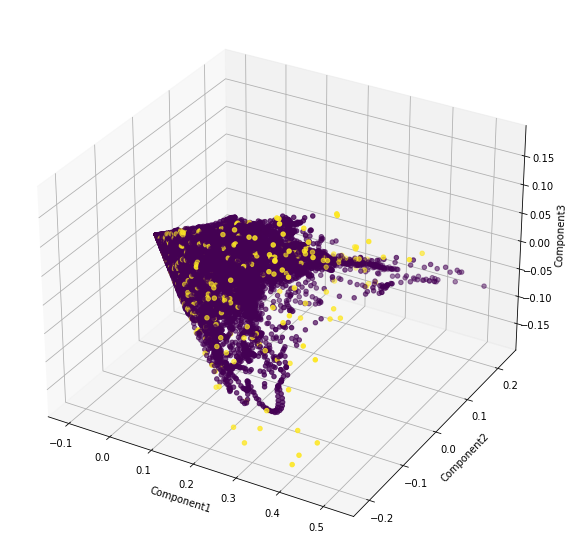

In [73]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=finalDf.Component1, 
    ys=finalDf.Component2, 
    zs=finalDf.Component3, 
    c=finalDf.outlier, 
)
ax.set_xlabel('Component1')
ax.set_ylabel('Component2')
ax.set_zlabel('Component3')
plt.show()

<AxesSubplot:xlabel='Component1', ylabel='Component2'>

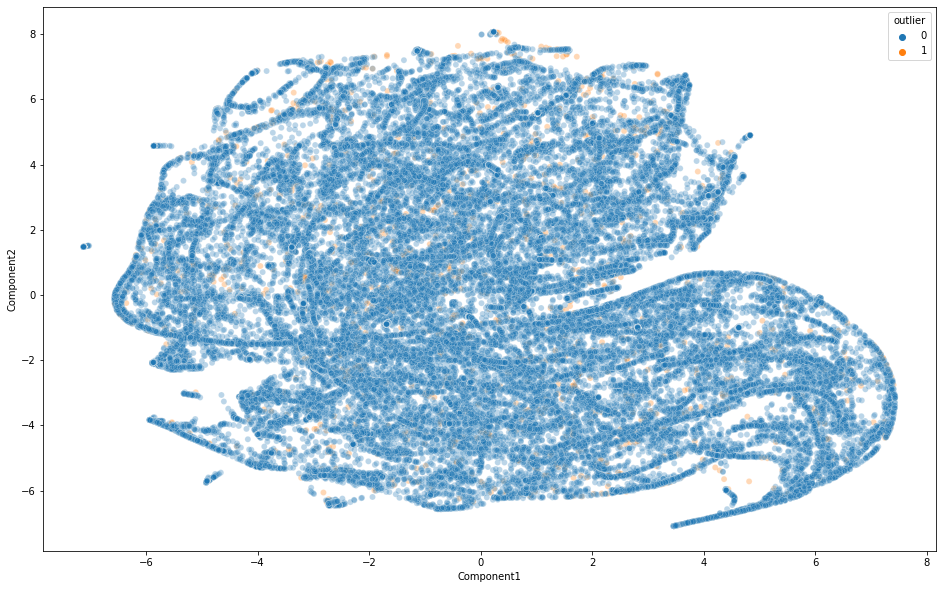

In [90]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=50, n_iter=300)
tsne_results = tsne.fit_transform(df.drop(columns=['outlier']))

df_tsne = pd.DataFrame()
df_tsne['Component1'] = tsne_results[:,0]
df_tsne['Component2'] = tsne_results[:,1]
df_tsne = pd.concat([df_tsne, df.outlier], axis = 1)
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="Component1", y="Component2",
    hue="outlier",
    data=df_tsne,
    legend="full",
    alpha=0.3
)

<AxesSubplot:xlabel='Component1', ylabel='Component2'>

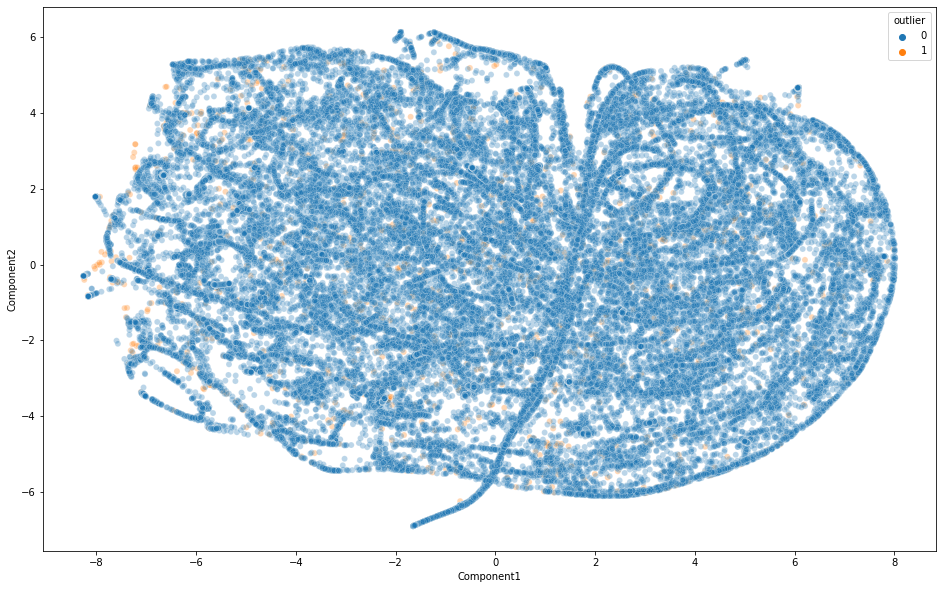

In [91]:
pca_10 = PCA(n_components=10)
pca_result_10 = pca_10.fit_transform(df.drop(columns=['outlier']))

tsne = TSNE(n_components=2, perplexity=50, n_iter=300)
tsne_results = tsne.fit_transform(pca_result_10)

df_tsne = pd.DataFrame()
df_tsne['Component1'] = tsne_results[:,0]
df_tsne['Component2'] = tsne_results[:,1]
df_tsne = pd.concat([df_tsne, df.outlier], axis = 1)
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="Component1", y="Component2",
    hue="outlier",
    data=df_tsne,
    legend="full",
    alpha=0.3
)

### Supervised learning 

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
])




num_features = df.drop(columns=['outlier']).select_dtypes(include=['int64', 'float64']).columns


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features)
    ]
)


pipe_lr = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(multi_class = 'auto', solver = 'liblinear'))
])

pipe_knn = Pipeline(steps = [('preprocessor', preprocessor),
                           ('classifier', KNeighborsClassifier(n_neighbors=2))])

pipe_svm = Pipeline(steps = [('preprocessor', preprocessor),
                           ('classifier', SVC(probability=True))])

In [5]:
from sklearn.model_selection import train_test_split

x = df.drop(columns=['outlier'])
y = df['outlier']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify = y)


In [6]:
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score

def get_score(pipe, x_test, y_test):
    print(f"{pipe.named_steps['classifier']}")
    print(f"ROC AUC score - {roc_auc_score(y_test, pipe.predict_proba(x_test)[:,1])}")
    print(f"PR AUC  score - {average_precision_score(y_test, pipe.predict_proba(x_test)[:,1])}\n")
    print(f"classification_report\n{classification_report(y_test, pipe.predict(x_test))}")

In [14]:
from sklearn.model_selection import cross_val_score


pipe_lr.fit(x_train, y_train)
pipe_knn.fit(x_train, y_train)
pipe_svm.fit(x_train, y_train)

# scores_pipe_lr = cross_val_score(pipe_lr, x_train, y_train, cv = 3, scoring='roc_auc')
# scores_pipe_knn = cross_val_score(pipe_knn, x_train, y_train, cv = 3, scoring='roc_auc')
# scores_pipe_svm = cross_val_score(pipe_svm, x_train, y_train, cv = 3, scoring='roc_auc')


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['att1', 'att2', 'att3', 'att4', 'att5', 'att6', 'att7', 'att8', 'att9',
       'att10', 'att11', 'att12', 'att13', 'att14', 'att15', 'att16', 'att17',
       'att18', 'att19', 'att20', 'att21', 'att22', 'att23', 'att24', 'att25',
       'att26', 'att27'],
      dtype='object'))])),
                ('classifier', SVC(probability=True))])

In [65]:
get_score(pipe_knn, x_test, y_test)
get_score(pipe_lr, x_test, y_test)
get_score(pipe_svm, x_test, y_test)


KNeighborsClassifier(n_neighbors=2)
ROC AUC score - 0.6822781193047854
PR AUC  score - 0.20941283381751216

classification_report
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     14548
           1       0.76      0.10      0.18       452

    accuracy                           0.97     15000
   macro avg       0.87      0.55      0.58     15000
weighted avg       0.97      0.97      0.96     15000

LogisticRegression(solver='liblinear')
ROC AUC score - 0.5904546073906093
PR AUC  score - 0.05165257105576737

classification_report
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     14548
           1       0.00      0.00      0.00       452

    accuracy                           0.97     15000
   macro avg       0.48      0.50      0.49     15000
weighted avg       0.94      0.97      0.95     15000

SVC(probability=True)
ROC AUC score - 0.7006386852433567
PR AUC  score - 0.19570145

## Unsupervised learning

In [49]:
from sklearn.cluster import DBSCAN
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import adjusted_rand_score, silhouette_score, calinski_harabasz_score
from sklearn.metrics import mutual_info_score, adjusted_mutual_info_score, normalized_mutual_info_score

pipe_dbscan = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('classifier', DBSCAN())
])

pipe_oc_cvm = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('classifier', OneClassSVM())
])

pipe_IF = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('classifier', IsolationForest())
])

pipe_knn = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('classifier', NearestNeighbors())
])



In [51]:
pipe_dbscan.fit(x_train)
pipe_IF.fit(x_train)
pipe_knn.fit(x_train)
pipe_oc_cvm.fit(x_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['att1', 'att2', 'att3', 'att4', 'att5', 'att6', 'att7', 'att8', 'att9',
       'att10', 'att11', 'att12', 'att13', 'att14', 'att15', 'att16', 'att17',
       'att18', 'att19', 'att20', 'att21', 'att22', 'att23', 'att24', 'att25',
       'att26', 'att27'],
      dtype='object'))])),
                ('classifier', OneClassSVM())])

In [66]:
def get_dbscan_score(pipe, x_train, y_train):
    print(f"{adjusted_rand_score(y_train, pipe['classifier'].labels_)}")
    print(f"{silhouette_score(x_train, pipe['classifier'].labels_)}")
    print(f"{mutual_info_score(y_train, pipe['classifier'].labels_)}")
    print(f"{adjusted_mutual_info_score(y_train, pipe['classifier'].labels_)}")
    print(f"{normalized_mutual_info_score(y_train, pipe['classifier'].labels_)}")

In [67]:
get_dbscan_score(pipe_dbscan, x_train, y_train)

0.001423843474929852
-0.5349517214508613
0.008426359168418567
0.005022254410613489
0.009028391862333743


### Hyperparameter optimization

In [ ]:
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.preprocessing import FunctionTransformer


grid_params = {    
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'classifier__C':  np.linspace(1e-4, 1e+5, 8),
    'classifier__kernel':  ['sigmoid', 'linear', 'poly', 'rbf'],
    'classifier__degree': [1, 2],
    'classifier__max_iter': [1000, 5000],
    'classifier__gamma': ['scale', 'auto'],
}


clf = GridSearchCV(pipe_svm, grid_params, cv = 5, n_jobs=-1, verbose=True, scoring='average_precision')
clf.fit(x_train, y_train)
print("Best Score: ", clf.best_score_)
print(clf.best_params_)
print('\n')

y_pred = pipe_svm.predict(x_test)
print(f"Score before optimization")
get_score(pipe_svm, x_test, y_test)
print('\n')

print(f"Score after optimization")
get_score(clf.best_estimator_, x_test, y_test)


In [ ]:
from sklearn.model_selection import GridSearchCV
import numpy as np


grid_params = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    "classifier__n_neighbors":  [2, 5, 10],
    "classifier__weights":  ["uniform", "distance"]
}


clf = GridSearchCV(pipe_knn, grid_params, cv = 5, n_jobs=-1, verbose=True, scoring='average_precision')
clf.fit(x_train, y_train)
print("Best Score: ", clf.best_score_)
print(clf.best_params_)
print('\n')

y_pred = pipe_knn.predict(x_test)
print(f"Score before optimization")
get_score(pipe_knn, x_test, y_test)
print('\n')


print(f"Score after optimization")
get_score(clf.best_estimator_, x_test, y_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
import numpy as np

from sklearn.preprocessing import FunctionTransformer

grid_params = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    "classifier__C": np.logspace(-3, 3, 7), 
    "classifier__penalty": ["l1", "l2"],
    "classifier__max_iter": [5000],
    "classifier__class_weight": ["balanced"]
}


clf = GridSearchCV(pipe_lr, grid_params, cv = 5, n_jobs=-1, verbose=True, scoring='roc_auc')
clf.fit(x_train, y_train)
print("Best Score: ", clf.best_score_)
print(clf.best_params_)
print('\n')

y_pred = pipe_lr.predict(x_test)
print(f"Score before optimization")
get_score(pipe_lr, x_test, y_test)
print('\n')

y_pred = clf.best_estimator_.predict(x_test)
print(f"Score after optimization")
get_score(clf.best_estimator_, x_test, y_test)